In [1]:
# Applying Ridge regularization technique on the heating dataset with added polynomial features.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [3]:
heating = pd.read_csv("heating_1.csv")

In [4]:
Y = heating['Y1']
X = heating.drop('Y1',axis = 1)

In [5]:
# for k in range(1,9):
#     S = (X[("X%s")%(str(k))].values) ** 2
#     S_pandas = pd.Series(S)
#     X[("X%s_2")%(str(k))] = S_pandas

In [6]:
for k in range(1,9):
    S = (X[("X%s")%(str(k))].values) ** 3
    S_pandas = pd.Series(S)
    X[("X%s_3")%(str(k))] = S_pandas

In [7]:
count = 24
for i in range(1,9):
    for j in range(i,9):
        pairwise_combinations = (X[("X%s")%(str(i))].values)*(X[("X%s")%(str(j))].values)
        pair_combos = pd.Series(pairwise_combinations)
        X[("X%s%s")%(str(i),str(j))] = pair_combos
        count = count + 1
        

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [45]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha = 0.001, normalize = True)
lassoReg.fit(X_train, Y_train)
pred = lassoReg.predict(X_test)

In [46]:
mse = np.mean((pred - Y_test)**2)

In [47]:
print("MSE for the test data is {}".format(np.sqrt(mse)))  

MSE for the test data is 2.51112744992


In [48]:
coef = lassoReg.coef_

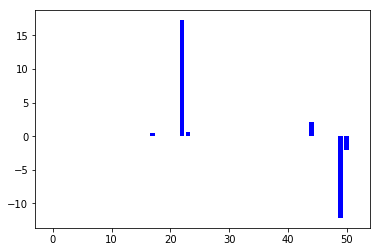

In [49]:
N = len(coef)
x = range(N)
plt.bar(x,coef,color='blue')
plt.show()

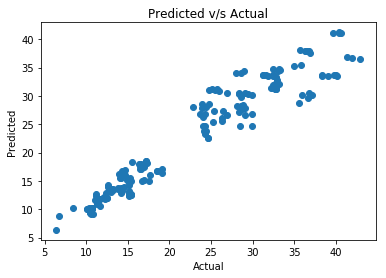

In [50]:
plt.scatter(Y_test, pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted v/s Actual")
plt.show()

In [51]:
pred_train = lassoReg.predict(X_train)
mse_train = np.mean((pred_train - Y_train)**2)
print("MSE for the train data is {}".format(np.sqrt(mse_train)))

MSE for the train data is 2.54221074993


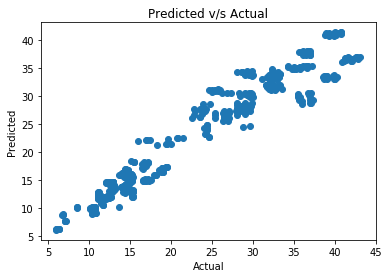

In [52]:
plt.scatter(Y_train, pred_train)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted v/s Actual")
plt.show()

In [53]:
pd.DataFrame(zip(X.columns, lassoReg.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,X1,-0.000000e+00
1,X2,0.000000e+00
2,X3,3.065152e-02
3,X4,0.000000e+00
4,X5,0.000000e+00
5,X6,-0.000000e+00
6,X7,0.000000e+00
7,X8,0.000000e+00
8,X1_3,0.000000e+00
9,X2_3,0.000000e+00


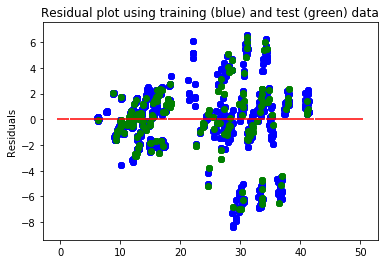

In [64]:
plt.scatter(pred_train, pred_train - Y_train, c = 'b')
plt.scatter(pred, pred - Y_test, c = 'g')
plt.scatter(np.linspace(0,50),np.zeros(shape = 50), c = 'r', marker = '_')
plt.title('Residual plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.show()

In [65]:
coefficients = lassoReg.coef_

In [69]:
type(coefficients)
np.count_nonzero(coefficients)

16